<a href='https://www.hexnbit.com/'> <img src='https://www.hexnbit.com/wp-content/uploads/2019/09/hexnbit_final_66px.png'/> </a>

All cells must be suitably commented / documented.

### Read Dataset

In [1]:
import pandas as pd # importing pandas
file= pd.read_csv('glass.csv') # reading the csv file
file.head()


1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.00.1  1
0  1.51761  13.89  3.60  1.36  72.73  0.48  7.83   0.0    0.00  1
1  1.51618  13.53  3.55  1.54  72.99  0.39  7.78   0.0    0.00  1
2  1.51766  13.21  3.69  1.29  72.61  0.57  8.22   0.0    0.00  1
3  1.51742  13.27  3.62  1.24  73.08  0.55  8.07   0.0    0.00  1
4  1.51596  12.79  3.61  1.62  72.97  0.64  8.07   0.0    0.26  1

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import (XGBClassifier, plot_importance)

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Imported all the libraries required

In [142]:
df= pd.read_csv('glass.csv') # reading the csv filve
features= df.columns[:-1].tolist()
header_names=['RI','Na','Mg','AL','Si','K','Ca','Ba','Fe','Type'] # giving header names
df= pd.read_csv('glass.csv', header=None, skiprows=None, names= header_names)
df.head(20)
# printing 20 rows

RI     Na    Mg    AL     Si     K    Ca   Ba    Fe  Type
0   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5   1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6   1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7   1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8   1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
10  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24     1
11  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00     1
12  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24     1
13  1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.0  0.17     1
14  1.51763  12.61  3.59  1.31  73.29  0.58  8.50  0.0  0.00     1
15  1.51761  12.81  3.54  1.23  73.24  0.58  8.39  0.0  0.00     1
16  1.51784  12.68  3.67  1.16  73.11  0.61  8.70  0.0  0.00     1
17  1.52196  14.36  3.85  0.89  71.36  0.15  9.15  0.0  0.00     1
18  1.51911  13.90  3.73  1.18  72.12  0.06  8.89  0.0  0.00     1
19  1.51735  13.02  3.54  1.69  72.73  0.54  8.44  0.0  0.07     1

### Check for Missing Data

In [143]:
df.info() # to understand the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
AL      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [144]:
df.tail(5) # showing the bottom rows

RI     Na   Mg    AL     Si     K    Ca    Ba   Fe  Type
209  1.51623  14.14  0.0  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.0  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.0  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.0  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.0  2.08  73.36  0.00  8.62  1.67  0.0     7

In [145]:
df.dtypes # shows datatype of each Row

RI      float64
Na      float64
Mg      float64
AL      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [146]:
df.isnull().sum() # checking the missing data

RI      0
Na      0
Mg      0
AL      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [147]:
df.describe() # shows the statistics of the given dataset

RI          Na          Mg          AL          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

### No Missing Data in the Dataset

### analysing the data:

<Figure size 432x288 with 0 Axes>

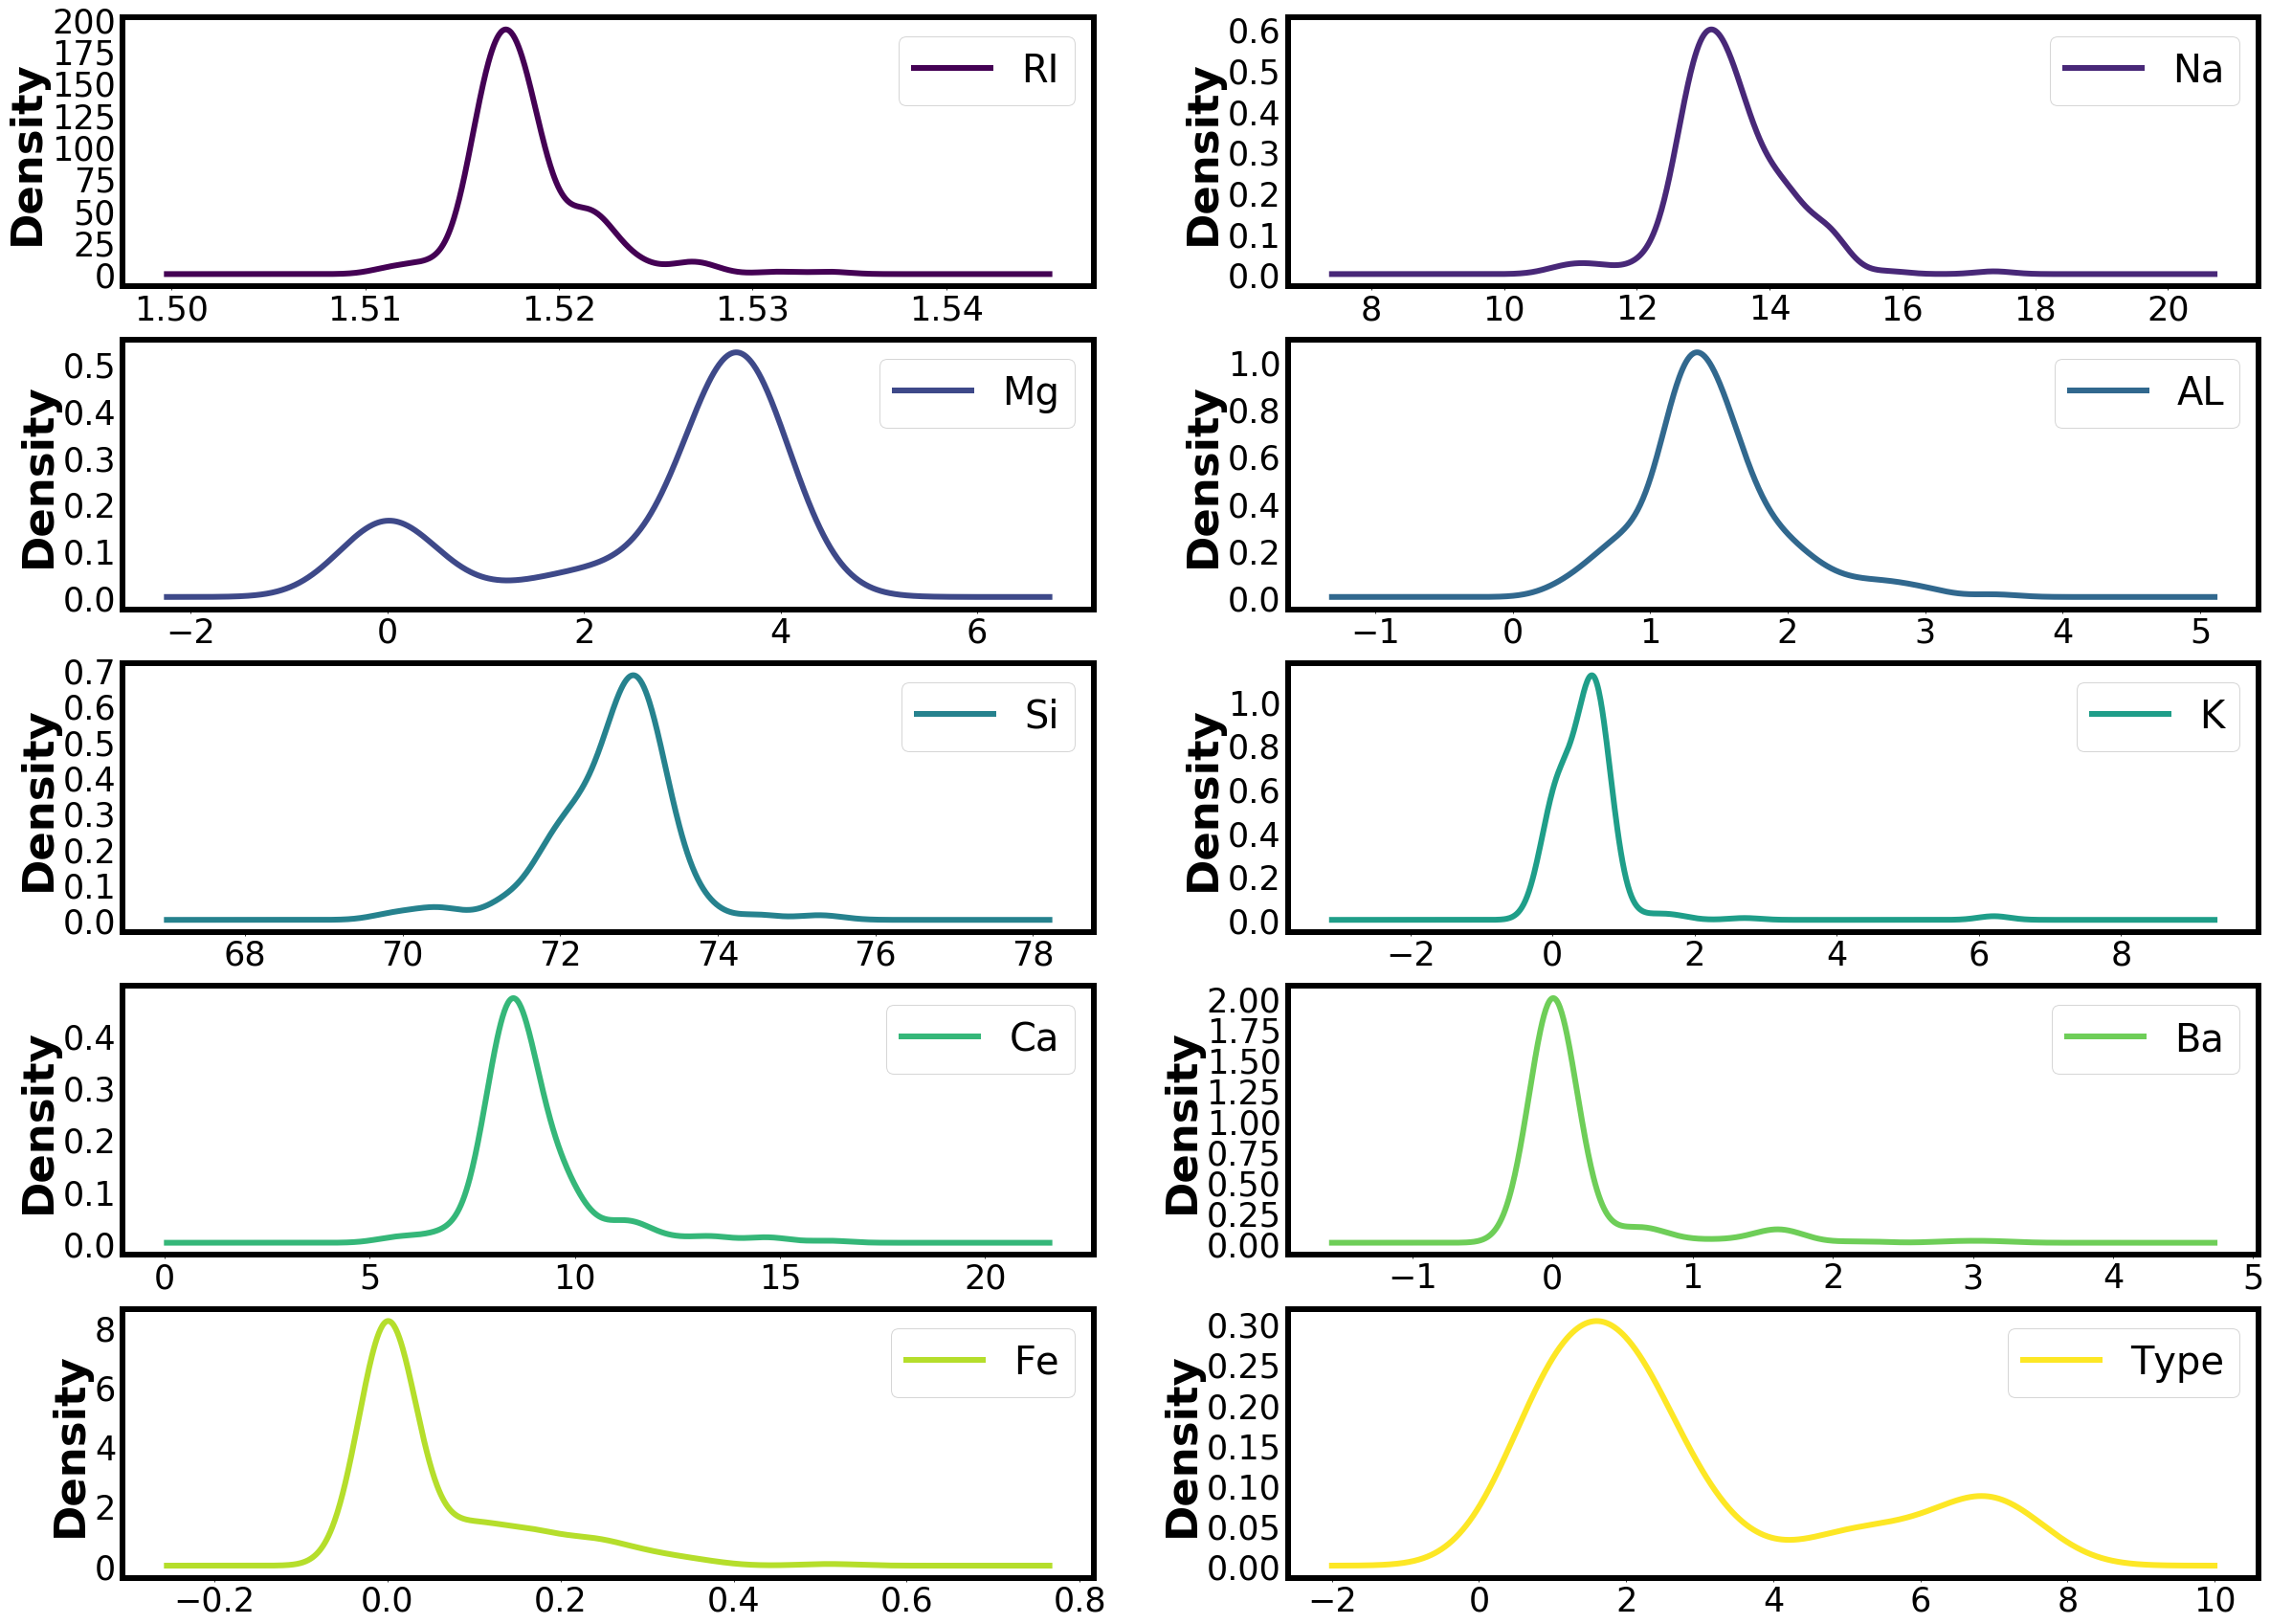

In [148]:
import matplotlib as mpl # importing matplotlib library
plt.figure()
mpl.rcParams['axes.linewidth'] = 6 #set the value globally
mpl.rcParams['legend.fontsize'] = 40 #set the value globally
Axes = df.plot(kind='density',lw=6, subplots=True, layout=(5,2),figsize=(40, 30),
                 sharex = False ,sharey=False, legend=True , colormap = "viridis")
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 35) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 35) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 45) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 45) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'weight', 'bold') for item in Axes.ravel()]
plt.show()

### Using Box Plots:

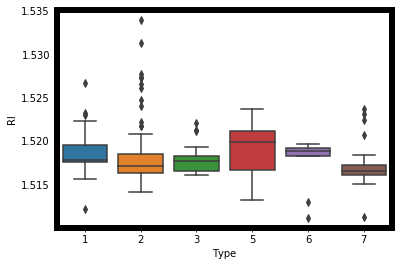

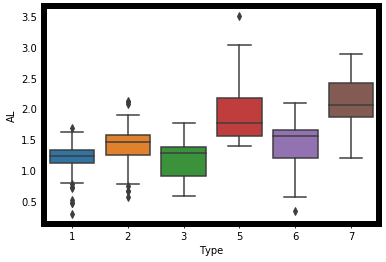

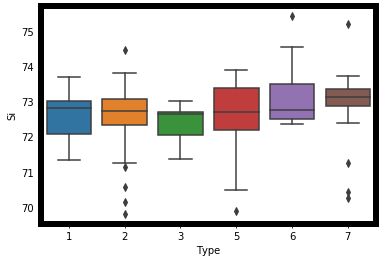

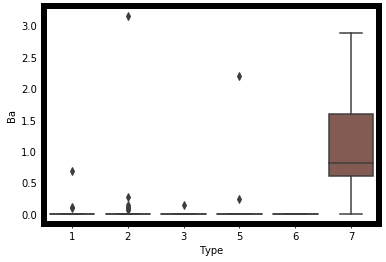

In [149]:
header_names= df.columns # giving columns
for i in range(len(header_names)-1): # giving a certain length
    figure= plt.figure()
    ax= sns.boxplot (x= 'Type', y=header_names[i], data=df)

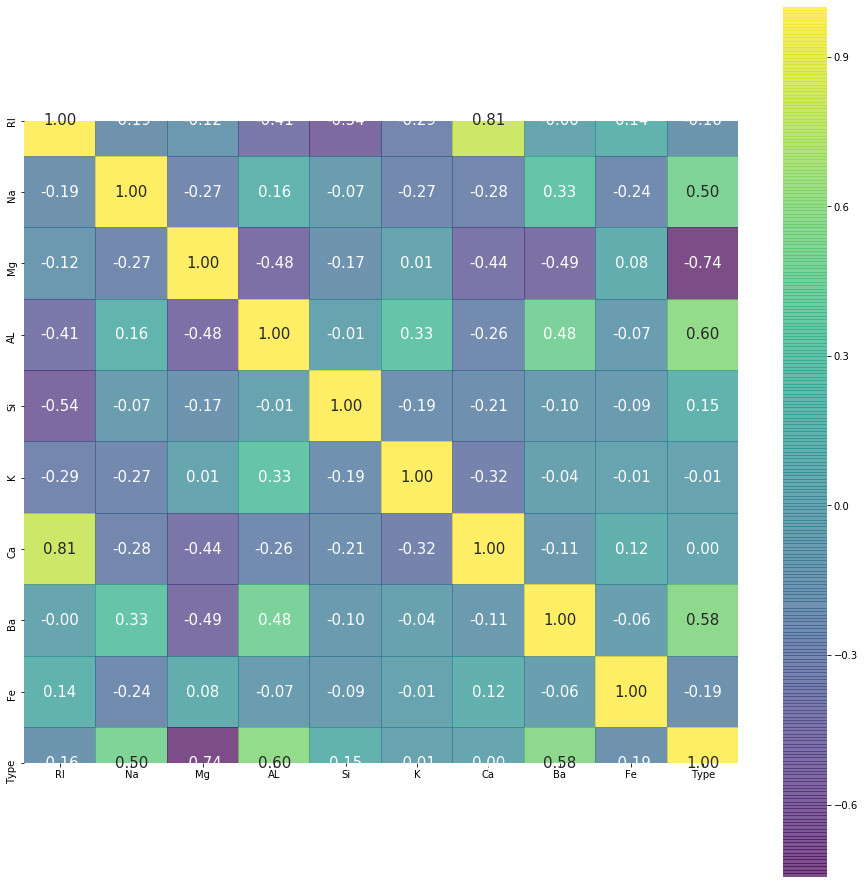

In [150]:
# plotting a heatmap
corr = df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels=df.columns.values, yticklabels= df.columns.values, alpha = 0.7,   cmap= 'viridis')
plt.show()


### Handle Categorical Values

In [151]:
df.describe() # statistical data for reference

RI          Na          Mg          AL          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [152]:
df['Type'].value_counts() # Type acts as target variable

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

### Split Data for Training and Testing

In [66]:
x= df.drop(['Type'], axis=1)
y= df['Type'].values
from sklearn.model_selection import train_test_split # splitting x and y into training and testing sets
x_train, x_test, y_train, y_test,= train_test_split(x, y, test_size= 0.2)
print(x_train.dtypes)
print(x_train.head())
print('--------------------------------')
print(np.unique(y_train))
print(np.unique(y_test))

RI    float64
Na    float64
Mg    float64
AL    float64
Si    float64
K     float64
Ca    float64
Ba    float64
Fe    float64
dtype: object
          RI     Na    Mg    AL     Si     K    Ca    Ba    Fe
191  1.51602  14.85  0.00  2.38  73.28  0.00  8.76  0.64  0.09
68   1.52152  13.12  3.58  0.90  72.20  0.23  9.82  0.00  0.16
115  1.51846  13.41  3.89  1.33  72.38  0.51  8.28  0.00  0.00
10   1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.00  0.24
30   1.51768  12.65  3.56  1.30  73.08  0.61  8.69  0.00  0.14
--------------------------------
[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [71]:
len(x_test)


43

In [70]:
len(x_train) # knowing the lenght of x_train

171

### Apply different Classification Algorithms and tune them

In [86]:
from sklearn import tree
from sklearn import metrics
# decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_predicted = d_tree.predict(x_test)
decision_tree = metrics.accuracy_score(y_pred,y_test)

# Random Forest
Rand1 = RandomForestClassifier(max_depth = 3, min_samples_split=2, n_estimators = 10, random_state = 1)
Rand1.fit(x_train, y_train)
y_predicted = Rand_f.predict(x_test)
random_forest = metrics.accuracy_score(y_pred,y_test)

# Support Vector Machines
svm  = SVC()
svm.fit(x_train,y_train)
y_predicted = svm.predict(x_test)
s_vector  = metrics.accuracy_score(y_pred,y_test)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
Rand1.score(x_test,y_test)
 # score test

0.6511627906976745

In [84]:
dt.score(x_test,y_test) # score test

0.6744186046511628

In [85]:
svm.score(x_test,y_test) # score test

0.6744186046511628

### Get performance metrics for all the applied classifiers

In [87]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_predicted)
cm  # creating a 1-d confusion matrix

array([[ 9,  1,  0,  0,  0,  0],
       [ 3, 14,  0,  1,  0,  0],
       [ 3,  2,  0,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  1],
       [ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  5]], dtype=int64)

In [140]:
%matplotlib inline
import seaborn as sn #  importing seaborn 
plt.figure(figsize=(10,10))
sn.heatmap(cm, annot=True)
plt.xlabel('predicted')
plt.ylabel('Truth') # creating a 2-D confusion Matrix

Text(69.0, 0.5, 'Truth')

In [114]:
import sklearn as skl
skl.metrics.classification_report(y_test, y_predicted, target_names=None, sample_weight=None, digits=2, output_dict=False)

# getting the classification_report

'              precision    recall  f1-score   support\n\n           1       0.60      0.90      0.72        10\n           2       0.74      0.78      0.76        18\n           3       0.00      0.00      0.00         5\n           5       0.33      0.33      0.33         3\n           6       0.00      0.00      0.00         2\n           7       0.83      1.00      0.91         5\n\n    accuracy                           0.67        43\n   macro avg       0.42      0.50      0.45        43\nweighted avg       0.57      0.67      0.61        43\n'

### This is the Scatter Matrix of the DataBase:

<Figure size 432x288 with 0 Axes>

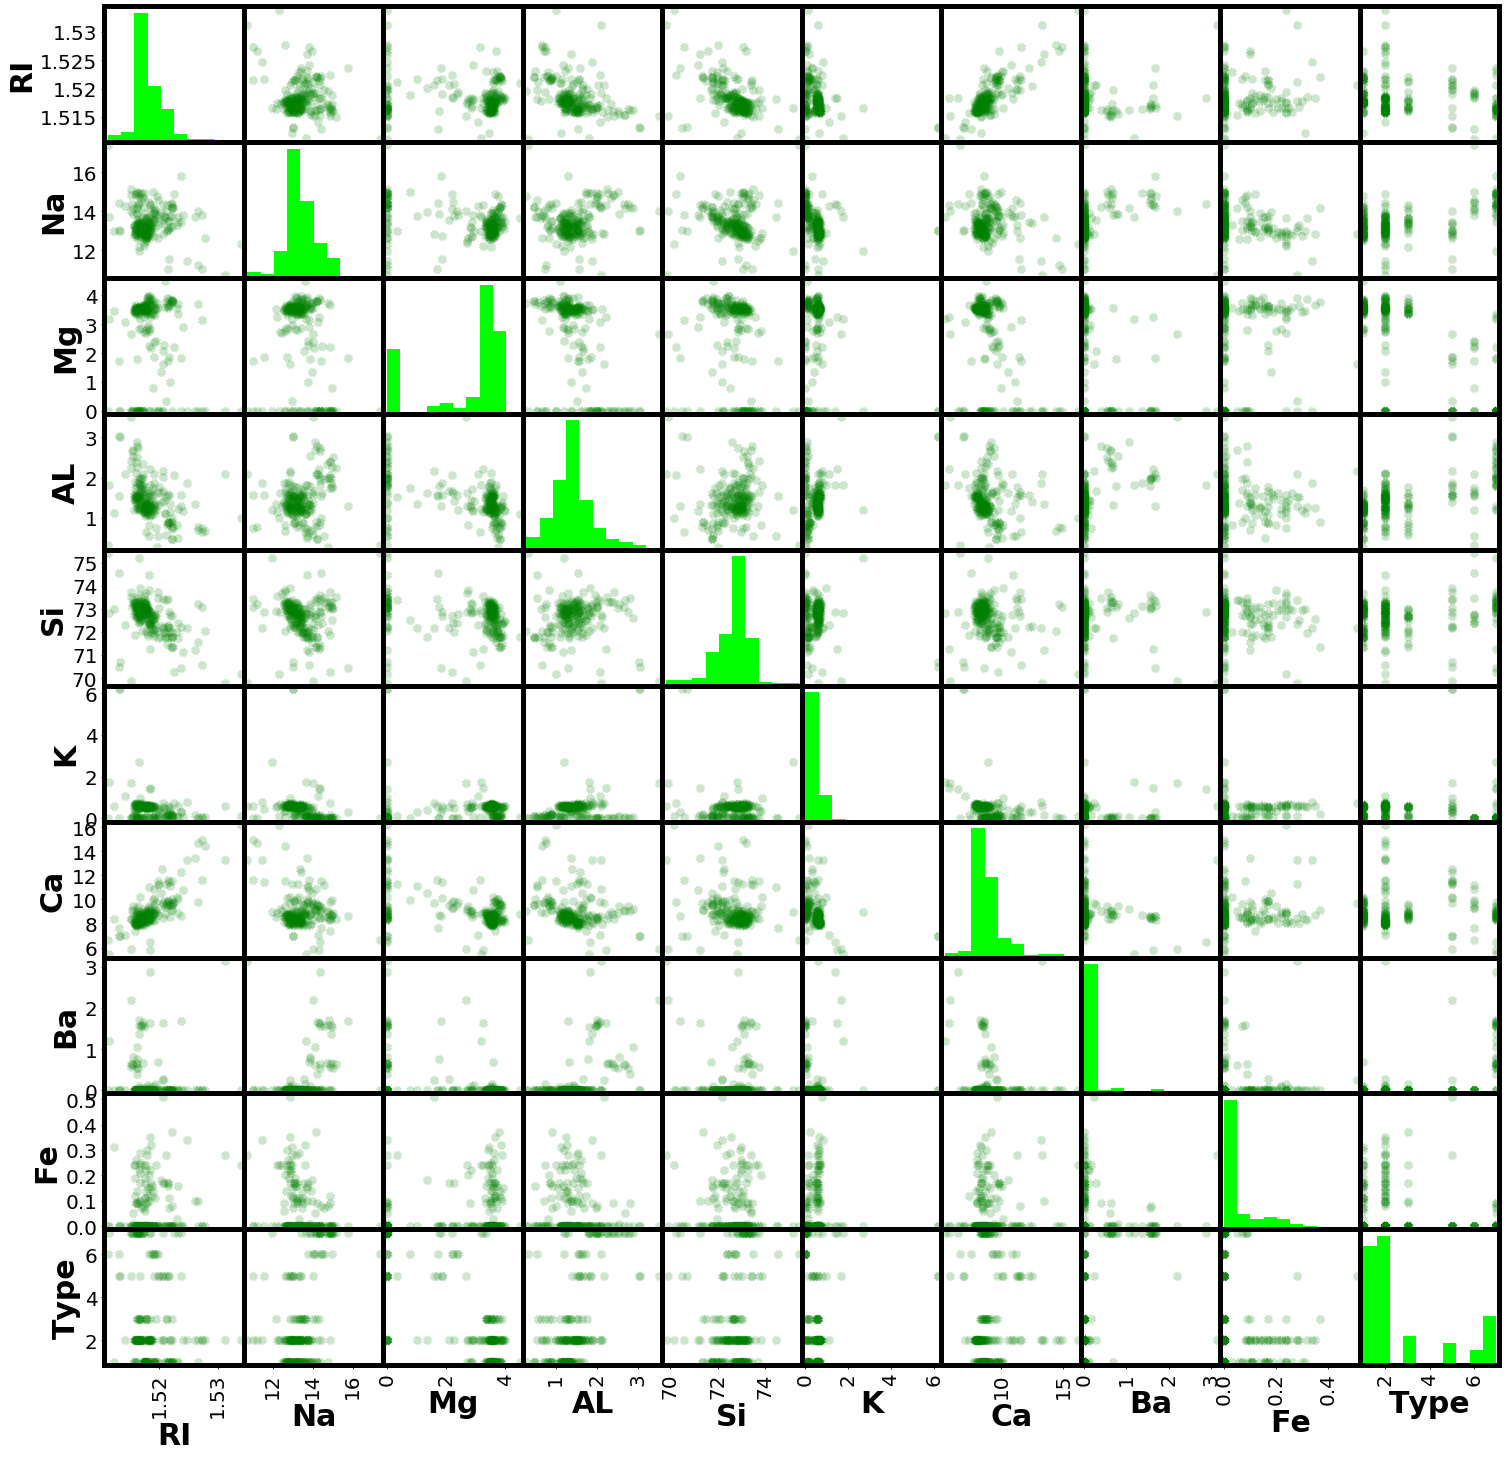

In [28]:
# plotting a scatterplot
from pandas.plotting import scatter_matrix
plt.figure()
mpl.rcParams['axes.linewidth'] = 5
Axes= scatter_matrix(df , alpha=0.2, lw=5 ,c='g',marker='x',hist_kwds={'color':['lime']},figsize=(25, 25))
[plt.setp(item.yaxis.get_majorticklabels(), 'size', 20) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_majorticklabels(), 'size', 20) for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'size', 30) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'size', 30) for item in Axes.ravel()]
[plt.setp(item.xaxis.get_label(), 'weight', 'bold') for item in Axes.ravel()]
[plt.setp(item.yaxis.get_label(), 'weight', 'bold') for item in Axes.ravel()]
plt.show()

### Visually compare the performance of all classifiers

In [125]:
Rand = RandomForestClassifier(min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500)
Rand.fit(x.iloc[:,1:2],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

TypeError: 'method' object is not subscriptable

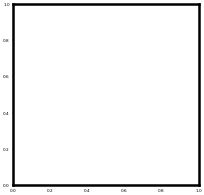

In [174]:
from sklearn import tree
fig,axes= plt.subplots(nrows= 1, ncols=1, figsize=(8,8), dpi= 30)
tree.plot_tree(dt,feature_names= df.get['feature_names'], class_names=df.get['target_names'],filled= True,rounded=True);